<a href="https://colab.research.google.com/github/maretafernanda/Python-Notebook/blob/main/DicodingCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dicoding Academy - Data Scientist
### Belajar Analisis Data dengan Python
#### Latihan Data Wrangling [Dicoding Collection](https://github.com/dicodingacademy/dicoding_dataset/tree/main/DicodingCollection)
Pada contoh proyek ini, menggunakan dataset `DicodingCollection`. Ia merupakan hasil modifikasi dari dataset [Shopping Cart Database](https://www.kaggle.com/datasets/ruchi798/shopping-cart-database) yang dipublikasi dalam platform kaggle. Proses modifikasi ini bertujuan untuk memastikan dataset yang digunakan cukup merepresentasikan semua masalah yang umum dijumpai di industri.


Dicoding Collection atau sering disingkat DiCo merupakan sebuah perusahaan yang bergerak di bidang fashion. Ia memproduksi berbagai item fashion dan menjualnya melalui platform online.
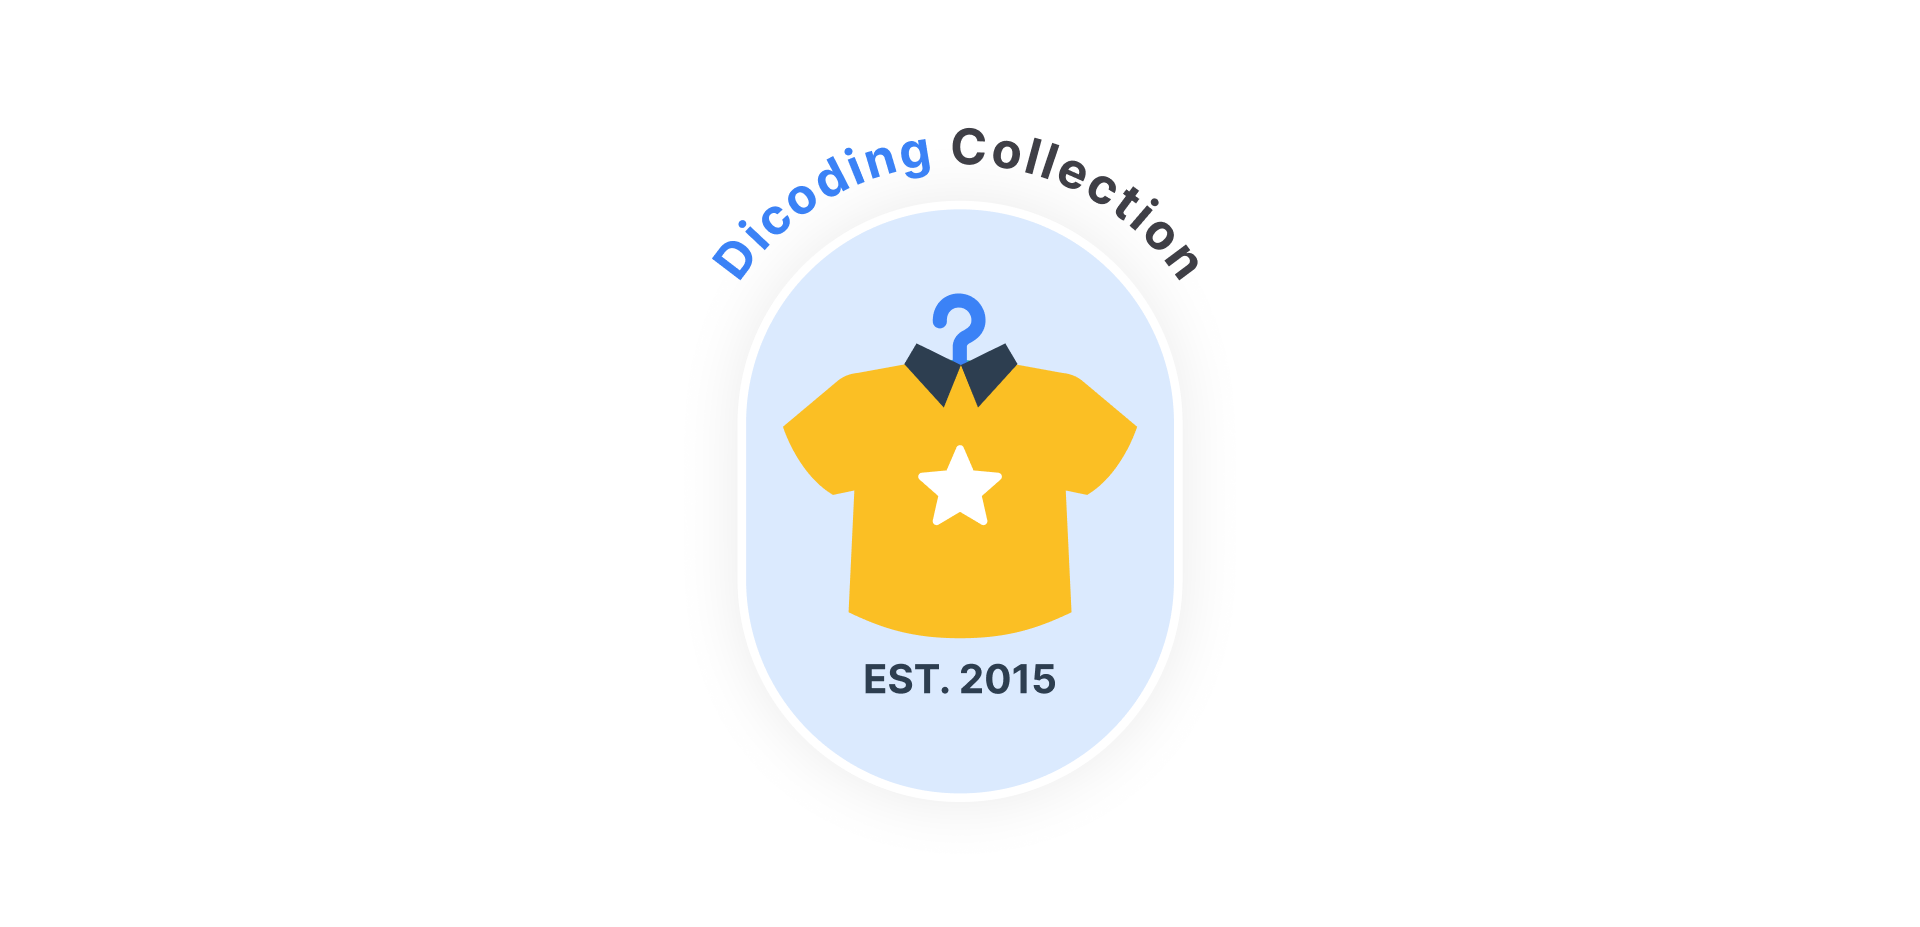
Sebagai perusahaan kekinian, DiCo menyadari betapa pentingnya data bagi perkembangan sebuah bisnis. Oleh karena itu, ia menyimpan semua history penjualan beserta informasi terkait produk dan customers dalam sebuah database. Database ini terdiri dari empat buah tabel, antara lain customers, orders, products, dan sales.

* Tabel customers: tabel ini menyimpan berbagai informasi terkait customer, seperti customer_id, customer_name, gender, age, home_address, zip_code, city, state, dan country.
* Tabel orders: tabel ini menyimpan berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id, order_date, dan delivery_date.
* Tabel products: tabel ini berisi berbagai informasi terkait sebuah produk, seperti product_id, product_type, product_name, size, colour, price, quantity, dan description.
* Tabel sales: tabel ini mengandung informasi detail terkait penjualan, seperti sales_id, order_id, product_id, price_per_unit, quantity, dan total_price.

In [2]:
# 1. Import library untuk menjalankan proyek ini: numpy, pandas, scipy, matplotlib, dan seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# Gathering Data
Mengumpulkan semua data yang dibutuhkan

---

In [3]:
# 2. Memuat (load) database yang diperlukan
#  a. Memuat tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [4]:
# 3. Memuat tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [5]:
# 4. Memuat tabel products
products_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [6]:
# 5. Memuat tabel sales
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


---

# Assessing Data
Menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

---

#### Menilai Data customers_df

In [7]:
# 1. Menilai Data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [8]:
# 2. Karena ada selisih dengan jumlah data pada 'gender' yang merujuk pada missing values, harus dipastikan dengan:
customers_df.isna().sum()
#kode ini digunakan untuk menampilkan informasi terkait jumlah missing values pada tabel

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [9]:
# 3. Memeriksa apakah ada duplikasi data atau tidak
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  6


In [10]:
# 4. Memeriksa parameter statistik dari kolom numerik
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


#### Menilai Data orders_df

In [11]:
# 1. Menilai Data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [12]:
# 2. Memeriksa apakah ada duplikasi data atau tidak
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
# 3. Memeriksa parameter statistik dari kolom numerik
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


#### Menilai Data products_df

In [14]:
# 1. Menilai Data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [15]:
# 2. Memeriksa apakah ada data duplikat atau tidak
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


#### Menilai Data sales_df

In [16]:
# 1. Menilai Data sales_df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [17]:
# 2. Karena ada selisih dengan jumlah data pada 'total_price' yang merujuk pada missing values, harus dipastikan dengan:
sales_df.isna().sum()
#kode ini digunakan untuk menampilkan informasi terkait jumlah missing values pada tabel

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [18]:
# 3. Memeriksa apakah ada data duplikat atau tidak
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

sales_df.describe()

Jumlah duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


---

# Cleaning Data
Membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

---

#### Membersihkan Data customers_df

In [19]:
# 1. Menghilangkan duplicate data dengan drop_duplicates()
customers_df.drop_duplicates(inplace=True)

In [20]:
# Memeriksa apakah masih ada data yang terduplikat
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
# 2. Menangani missing value dengan isna(), fillna()
# terdapat 3 metode u/ mengatasi missing value: dropping, imputation, dan interpolation
# u/ menentukan metode, di filtering dulu berdasarkan gender
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [22]:
# pada metode imputation, menggunakan nilai tertentu untuk mengganti missing value
# menggunakan nilai yang dominan sebagai pengganti missing value
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [23]:
# setelah diketahui nilai yang dominan dalam kolom gender adalah 'prefer not say', nilai inilah yang akan digunakan sebagai pengganti missing value
customers_df.fillna(value="Prefer not to say", inplace=True)

In [24]:
# untuk memastikan proses penggantian missing value sudah terjadi
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [25]:
# 3. Menangani inaccurate value (kolom 'age') menggunakan filtering
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [26]:
# setelah diketahui bahwa inaccurate value disebabkan oleh human error / kesalahan input, maka harus diganti
# menggunakan method replace()
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [27]:
# untuk memastikan proses penggantian inaccurate value sudah terjadi
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [28]:
# karena ada tambahan human error, maka diganti sesuai langkah sebelumnya
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [29]:
# untuk memastikan proses penggantian inaccurate value sudah terjadi (II)
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [30]:
# sekali lagi, untuk memastikan sudah tidak terdapat inaccurate value pada customers_df
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


#### Membersihkan Data orders_df

In [31]:
# mengubah tipe data kolom order_date dan delivery_date ke datetime menggunakan function to_datetime()
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [32]:
# untuk memastikan sudah terubah tipe datanya
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


#### Membersihkan Data products_df

In [33]:
# menghapus data duplikat
products_df.drop_duplicates(inplace=True)

In [34]:
# untuk memastikan task sudah berjalan
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan Data sales_df

In [35]:
# menampilkan data yang memiliki missing value
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [36]:
# mengatasi missing value pada total_price dengan mengalikan price_per_unit dengan quantity
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [37]:
# untuk melihat hasil dan memastikan nilai telah sesuai, memeriksa kembali jumlah missing value
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

---

# Joining Data

---

#### Menggabungkan `customers_df` dengan `orders_df`

In [38]:
# menggabungkan data customers_df dengan orders_df menggunakan outer_join
customers_orders_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "outer",
    left_on = "customer_id",
    right_on = "customer_id"
)
customers_orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1.0,64,30811.0,2021-08-30,2021-09-24,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
1,2.0,473,50490.0,2021-02-03,2021-02-13,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia
2,221.0,473,49366.0,2021-08-03,2021-08-17,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia
3,3.0,774,46763.0,2021-10-08,2021-11-03,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia
4,353.0,774,46198.0,2021-03-30,2021-04-05,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [39]:
# mencari data yang nunique
customers_orders_df.nunique()

order_id         1000
customer_id      1000
payment           995
order_date        291
delivery_date     305
customer_name    1000
gender              3
age                61
home_address     1000
zip_code          955
city              961
state               8
country             1
dtype: int64

In [40]:
# mencari data yang missing value
customers_orders_df.isna().sum()

order_id         384
customer_id        0
payment          384
order_date       384
delivery_date    384
customer_name      0
gender             0
age                0
home_address       0
zip_code           0
city               0
state              0
country            0
dtype: int64

#### Menggabungkan `sales_df` dengan `orders_df`

In [41]:
# menggabungkan data sales_df dengan orders_df menggunakan outer_join
orders_sales_df = pd.merge(
    left = sales_df,
    right = orders_df,
    how = "outer",
    left_on = "order_id",
    right_on = "order_id"
)
orders_sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,customer_id,payment,order_date,delivery_date
0,0.0,1,218.0,106.0,2.0,212.0,64,30811,2021-08-30,2021-09-24
1,1.0,1,481.0,118.0,1.0,118.0,64,30811,2021-08-30,2021-09-24
2,2.0,1,2.0,96.0,3.0,288.0,64,30811,2021-08-30,2021-09-24
3,3.0,1,1002.0,106.0,2.0,212.0,64,30811,2021-08-30,2021-09-24
4,4.0,1,691.0,113.0,3.0,339.0,64,30811,2021-08-30,2021-09-24


In [42]:
# mencari data apakah ada yang missing value
orders_sales_df.isna().sum()

sales_id          7
order_id          0
product_id        7
price_per_unit    7
quantity          7
total_price       7
customer_id       0
payment           0
order_date        0
delivery_date     0
dtype: int64

#### Menggabungkan `sales_df` dengan `products_df`

In [43]:
# menggabungkan data sales_df dengan products_df menggunakan outer_join
products_sales_df = pd.merge(
    left = sales_df,
    right = products_df,
    how = "outer",
    left_on = "product_id",
    right_on = "product_id"
)
products_sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0.0,1.0,218,106.0,2.0,212.0,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1129.0,233.0,218,106.0,3.0,318.0,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
2,4616.0,924.0,218,106.0,2.0,212.0,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
3,1.0,1.0,481,118.0,1.0,118.0,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
4,349.0,79.0,481,118.0,2.0,236.0,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"


In [44]:
# mencari data apakah ada yang missing value
products_sales_df.isna().sum()

sales_id          27
order_id          27
product_id         0
price_per_unit    27
quantity_x        27
total_price       27
product_type       0
product_name       0
size               0
colour             0
price              0
quantity_y         0
description        0
dtype: int64

---

# Latihan Exploratory Data Analysis

---

### Menentukan Pertanyaan Bisnis
Di tahap ini, mendefinisikan berbagai pertanyaan bisnis yang akan digunakan sebagai kompas dalam proses eksplorasi data.



Contoh kasus dari perusahaan online fashion bernama Dicoding Collection atau disingkat DiCo.
Sebagai perusahaan yang bergerak di bidang online fashion, DiCo perlu mengevaluasi performa penjualan (sales) dan memahami item fashion yang paling banyak dibeli. Selain itu, ia juga perlu lebih memahami pelanggannya (customer) sehingga dapat membuat sebuah strategi campaign yang lebih efisien.
Berdasarkan beberapa masalah tersebut, dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut:

* Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
* Produk apa yang paling banyak dan paling sedikit terjual?
* Bagaimana demografi pelanggan yang kita miliki?
* Kapan terakhir pelanggan melakukan transaksi?
* Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
* Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

Inilah keenam pertanyaan bisnis yang harus dijawab melalui proses analisis data.

### Melakukan Eksplorasi Data
Tahap ini membantu praktisi data untuk mengenal data yang sedang ditangani dan membuat strategi analisis yang paling efisien.

#### Eksplorasi Data `customers_df`
Dataset ini memuat berbagai informasi terkait **`customer`**, seperti `customer_id`, `customer_name`, `gender`, `age`, `home_address`, `zip_code`, `state`, dan `country`.

In [45]:
# Melihat rangkuman parameter statistik menggunakan method describe()
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik diatas, terdapat informasi **jumlah customer** sebanyak `count: 1001`, dengan **usia** di kisaran antara `age.min: 20` hingga `age.max: 80` dengan **rata-rata** umur `age.mean: 49.87` tahun dengan **standar deviasi** sebesar `age.std: 17.64` tahun.

In [46]:
# Melihat demografi pelanggan berdasarkan gender menggunakan method groupby() yang diikuti method agg()
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

Kode diatas menghasilkan sebuah pivot table yang memuat informasi **jumlah customer** (nunique customer_id) serta parameter yang dikelompokkan berdasarkan **gender**.
Berdasarkan pivot table diatas, diketahui bahwa **customer** didominasi oleh **gender** `gender: Prefer not to say`. Distribusi **age** masih cukup mirip di kisaran `age.min: 20` hingga `age.max: 80`

In [47]:
# Melihat persebaran jumlah pelanggan berdasarkan kota(City).
# menggunakan method groupby(). dan diurutkan nilainya menggunakan method sort_values() scr descending.
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [48]:
# Melihat persebaran jumlah pelanggan negara bagian(State).
# menggunakan method groupby(). dan diurutkan nilainya menggunakan method sort_values() scr descending.
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Berdasarkan hasil diatas, persebaran pelanggan cukup merata pada setiap kota dan negara bagian. Pelanggan paling banyak berada di kota East Aidan, East Sophia dan New Ava dengan masing-masing berjumlah 3 pelanggan, dan juga berasal dari negara bagian South Australia.

#### Eksplorasi Data `orders_df`
Dataset ini memuat berbagai informasi terkait sebuah `order`, seperti `order_id`, `customer_id`, `order_date`, dan `delivery_date`.

Berdasarkan informasi ini, bisa membuat kolom baru memuat `waktu pengiriman` tiap order dengan menghitung selisih `delivery_date - order_date` yang disimpan sebagai `delivery_time`.

Menggunakan method `apply()` untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom. Operasi yang akan dilakukan adalah menghitung `jumlah_detik` pada `delivery_time` menggunakan method `total_seconds()`. Nilai `jumlah_detik` tersebut selanjutnya diubah dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya.

In [49]:
# Membuat kolom baru dari menghitung selisih delivery_date - order_date -> delivery_time
# Mengubah jumlah_detik pada delivery_time menjadi satuan hari yang dibagi dengan 86400
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [50]:
orders_df.describe(include="all")

<ipython-input-50-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-50-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


Berdasarkan hasil tersebut, diketahui rata-rata pengiriman berdurasi 14 hari dengan maksimal pengiriman berdurasi 27 hari dan minimal pengiriman berdurasi 1 hari.

#### Eksplorasi Data `orders_df` dan `customers_df`
Pada `orders_df` terdapat kolom yang berisi informasi terkait pelanggan yang pernah melakukan order `customer_id`.

Informasi ini bisa digunakan untuk mengidentifikasi pelanggan yang **belum pernah melakukan order**.

Membuat kolom baru `status` pada data `customers_df` yang nantinya akan bernilai **Active** bagi yang pernah melakukan order dan **Non Active** bagi yang belum pernah melakukan order sama sekali menggunakan method `apply()`.

In [51]:
# Membuat kolom status untuk melihat riwayat pelanggan yang pernah melakukan order atau belum pernah sama sekali.
customer_id_in_orders_df = orders_df.customer_id.tolist() # Mengubah customer_id menjadi list
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
251,252,fulan 252,Prefer not to say,44,03 Evans RoadApt. 343,9494,Rileyview,Western Australia,Australia,Non Active
778,776,fulan 776,Prefer not to say,24,3744 Max PlaceApt. 109,8348,Harveyville,Australian Capital Territory,Australia,Active
106,107,fulan 107,Prefer not to say,35,20 Morrison RoadSuite 781,7264,Claudiaview,Western Australia,Australia,Active
932,927,fulan 927,Male,61,868 Eliza CrescentSuite 085,1341,Ryanfurt,Victoria,Australia,Active
579,578,fulan 578,Prefer not to say,75,256 Andrew CrestApt. 193,8281,East Marcus,New South Wales,Australia,Active


In [52]:
# Untuk memperoleh informasi terkait jumlah pelanggan berstatus "Active" dan "Non Active", bisa menggunakan pivot table.
customers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

Berdasarkan pivot table diatas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya yakni sebanyak 384 pelanggan atau sekitar 38% dari total pelanggan terdaftar.

Untuk mendapatkan informasi lebih banyak, kedua tabel tersebut perlu digabungkan melalui proses **join** atau **merge**.

In [53]:
# Untuk mendapatkan informasi lebih banyak, kedua tabel tersebut perlu digabungkan melalui proses join atau merge.
orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


Dari data diatas, terdapat beberapa hal yang bisa dijelajahi:

In [54]:
# 1. Jumlah order berdasarkan kota
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [55]:
# 2. Jumlah order berdasarkan state (negara bagian)
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

In [56]:
# 3. Jumlah order berdasarkan gender
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

In [57]:
# 4. Jumlah order berdasarkan kelompok usia
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x:
                                                                 "Youth" if x <= 24
                                                                 else(
                                                                     "Seniors" if x > 64
                                                                     else
                                                                     "Adults")
                                                                 )
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

#### Eksplorasi Data `product_df` dan `sales_df`
Sebagai permulaan, merangkum parameter statistik dari kedua data tsb menggunakan method `describe()`

In [58]:
# melihat parameter statistik product_df menggunakan method describe()
products_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [59]:
# melihat parameter statistik sales_df menggunakan method describe()
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara **90** hingga **119** dolar. Selain itu, setiap transaksi pelanggan paling banyak membeli 3 buah item dalam satu jenis produk dengan total harga sebesar **357** dolar.

Berikut cara mencari produk dengan harga termahal dan terendah:

In [60]:
# Cara mencari produk yang memiliki harga termahal dan termurah
products_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Berdasarkan hasil kode diatas, dapat dilihat bahwa produk termahal adalah item `Jacket Parka` dan produk termurah adalah item `Jacket Bomber`.

Berikut cara mencari informasi terkait produk berdasarkan tipe dan nama produknya menggunakan `pivot table`:

In [61]:
# Berdasarkan product_type nya
products_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [62]:
# Berdasarkan product_name nya
products_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

Pivot table diatas memberikan gambaran terkait produk apa aja yang dijual oleh Dicoding Collection.
Untuk mencari produk yang paling laris, praktisi data harus menggabungkan tabel `products_df` dan `sales_df`

In [63]:
# Join (merge) tabel products_df dan sales_df
products_sales_df = pd.merge(
    left = sales_df,
    right = products_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
products_sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai `price_per_unit` dan `price`. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya.

Membuat pivot table berdasarkan produk type untuk melihat informasi penjualan produk berdasarkan tipenya

In [64]:
# Melihat informasi penjualan produk berdasarkan tipenya
products_sales_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Berdasarkan hasil analisa diatas, `Trousers` merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, `Jacket` merupakan tipe produk yang paling banyak menyumbang revenue perusahaan.

Membuat pivot table yang sama untuk melihat informasi penjualan berdasarkan nama produk

In [65]:
# Melihat informasi penjualan berdasarkan nama produk
products_sales_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


Berdasarkan pivot table tersebut, diketahui bahwa produk `Denim` merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.

#### Eksplorasi Data `all_df`
`all_df` digunakan untuk menampung semua informasi dari keempat tabel yang dimiliki pada sebuah DataFrame.

In [67]:
# Membuat DataFrame all_df
all_df = pd.merge(
    left = products_sales_df,
    right = orders_customers_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


Setelah menampilkan keseluruhan data yang telah digabungkan, ingin melihat preferensi pembelian berdasarkan state pelanggan dan tipe produk

In [68]:
# Preferensi pembelian berdasarkan state dan product_type
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales.

Untuk mengetahui selera tipe produk pelanggan berdasarkan gender dan kelompok usia, berikut kode yang bisa digunakan:

In [69]:
# 1. Untuk mengetahui selera product_type berdasarkan gender:

all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [70]:
# 2. Untuk mengetahui selera product_type berdasarkan age:

all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

Nah, pivot table di atas dapat memberikan gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Semua informasi ini akan sangat membantu Anda dalam menjawab pertanyaan terkait preferensi pengguna berdasarkan demografinya.